In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np

In [2]:
with open("pend.json") as f:
    data = json.load(f)
val, t = np.array(data["val"]), np.array(data["t"])

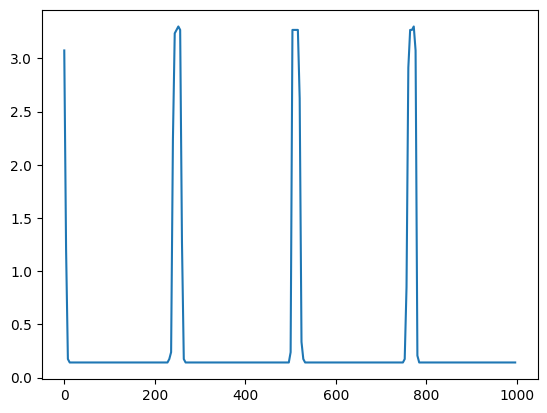

In [3]:
plt.plot(t[:250], val[:250])

In [4]:
def get_dist(t, val):
    val = val > 3

    i = 0
    got_first = False
    dist = []
    ts = []
    while i < len(val)-1:
        if not got_first:
            if val[i] == True and val[i+1] == False:
                t0 = t[i]
                got_first = True
        else:
            if val[i] == True and val[i+1] == False:
                dist.append((t[i] - t0))
                t0 = t[i]
                ts.append(t0)
        
        i += 1
    
    if len(ts)%2:
        dist.pop()
        ts.pop()
        
    new_dist, new_ts = [], []
    
    for n in range(len(dist)//2):
        new_dist.append(dist[2*n] + dist[2*n+1])
        new_ts.append(ts[2*n])
    
    return np.array(new_dist)/1000, np.array(new_ts)/1000
    

In [5]:
dist, ts = get_dist(t, val)

In [8]:
max(dist), min(dist)

(0.544, 0.492)

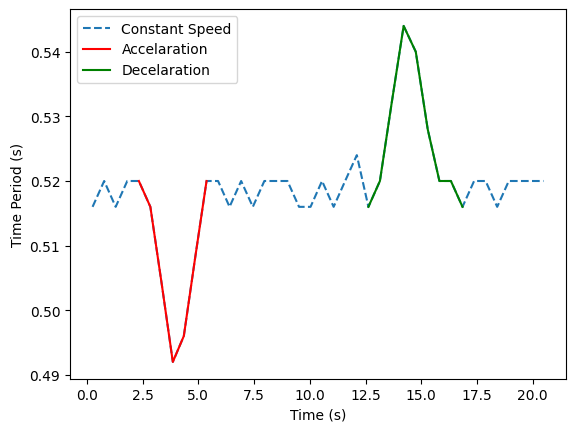

In [7]:
plt.plot(ts[:40], dist[:40], linestyle="--", label="Constant Speed")
plt.plot(ts[4:11], dist[4:11], 'r', label="Accelaration")
plt.plot(ts[24:33], dist[24:33], 'g', label="Decelaration")
plt.xlabel("Time (s)")
plt.ylabel("Time Period (s)")
plt.legend()

Text(0, 0.5, 'Potential (V)')

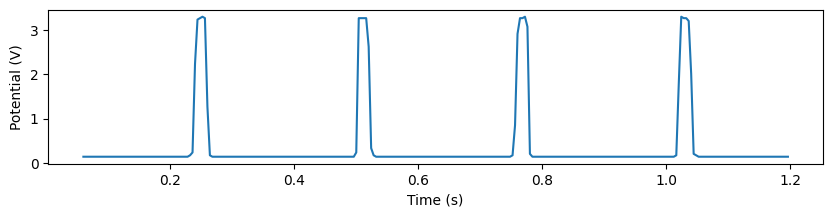

In [14]:
fig = plt.figure(figsize=(10, 2))
ax = fig.add_subplot(111)
ax.plot(t[15:300]/1000, val[15:300])
plt.xlabel('Time (s)')
plt.ylabel('Potential (V)')